# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Analysis - 
# Capomulin and Ramicane had lower tumor volume and a more compact dataset. 
# Meaning the data was closer to the average.
# Closer looker at Capomulin, over a period of 40 days the tumor size drastically decreased;
# from 45-50 (mm3) to 40-42 (mm3) after 30 days of treatment. That is roughly 20% decrease in volume. 
# Examining the mouse itself and it's weight compared to tumor size, you will notice that the sample size of mice
# followed the regression line showing that the increase in tumor size and mouse weight had a high correlation.
# or looks at the correlation value of .84. There is a high positive correlation. 
# A Side note, there was almost a perfect 50% split in male and female mice.

# with the analysis above, your can strongly infer that Compamulin has very satifactory results
# over a period of time and for either gender of mice, or size of mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.###NEED TO REMOVE THE HEADER
number_of_mice = merged_df['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#array(['g989'], dtype=object)
duplicate = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_ID = merged_df.loc[merged_df['Mouse ID'] == "g989", :]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame. #248 ###NEED TO REMOVE THE HEADER
number_of_mice_clean_df = clean_df['Mouse ID'].nunique()
number_of_mice_clean_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({'Mean Tumor Volume':mean,
                             'Median Tumor Volume':median,
                             'Tumor Volume Variance':var,
                             'Tumor Volume Std. Dev.':std,
                             'Tumor Volume Std. Err.':sem})
summary_stat



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

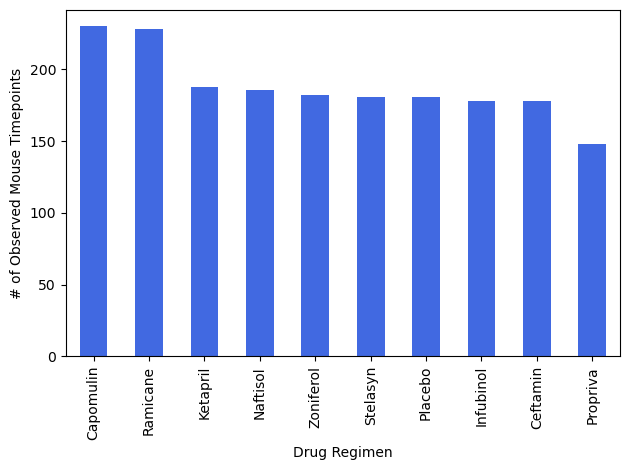

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='royalblue')
plt.ylabel('# of Observed Mouse Timepoints')

plt.tight_layout()
plt.show()

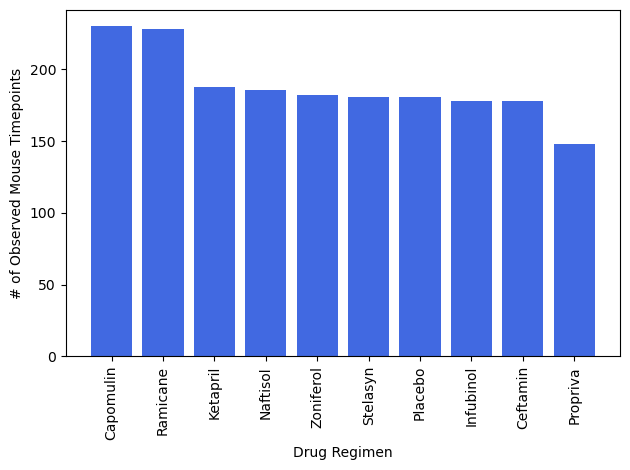

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="royalblue")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

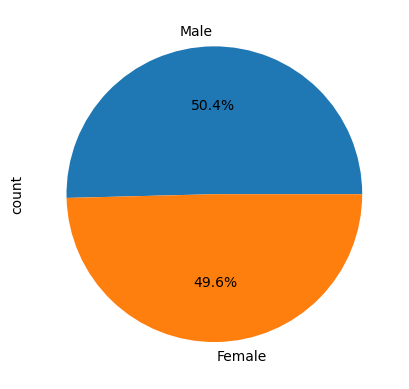

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender = clean_df.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]
# Get the unique mice with their gender
gender_count = mice_gender['Sex'].value_counts()

# Make the pie chart
gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.show()

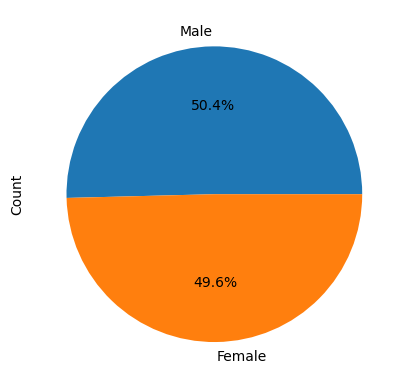

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mice_gender = clean_df.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Get the unique mice with their gender
gender_count = mice_gender['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_count,labels=gender_count.index, autopct='%1.1f%%')
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_volume = {}
for regimen in treatment_regimens:
    regimen_df = clean_df.loc[clean_df['Drug Regimen'] == regimen, :]

# Start by getting the last (greatest) timepoint for each mouse
    max_timepoint = regimen_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    max_timepoint.columns = ['Mouse ID', 'Max Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
    final_data = pd.merge(max_timepoint, regimen_df, left_on=['Mouse ID', 'Max Timepoint'], right_on=['Mouse ID', 'Timepoint'])
    final_data = final_data[['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)']]
    final_volume[regimen] = final_data


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
outlier = {}
tumor_vol_data = []

for regimen in treatment_regimens:
    df =final_volume[regimen]
    tumor_vol_data.append(df['Tumor Volume (mm3)'])
    

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
iqr = quartiles[0.75] - quartiles[0.25]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

lower_bound = quartiles[0.25] -1.5 * iqr
upper_bound = quartiles[0.75] +1.5 * iqr
outliers = df[(df['Tumor Volume (mm3)'] < lower_bound) | (df['Tumor Volume (mm3)'] > upper_bound)]

outlier[regimen] = {'IQR':iqr, 'Lower Bound':lower_bound, 'Upper Bound':upper_bound, 'Outliers':outliers}

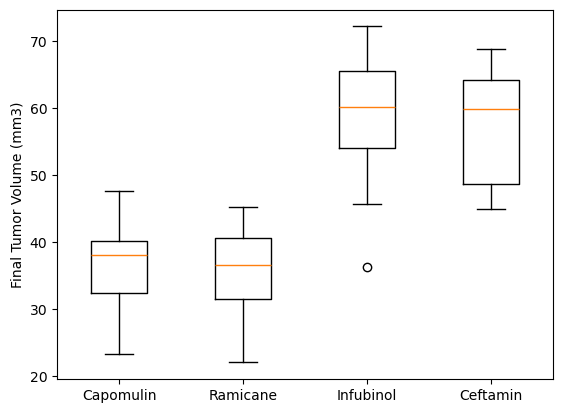

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

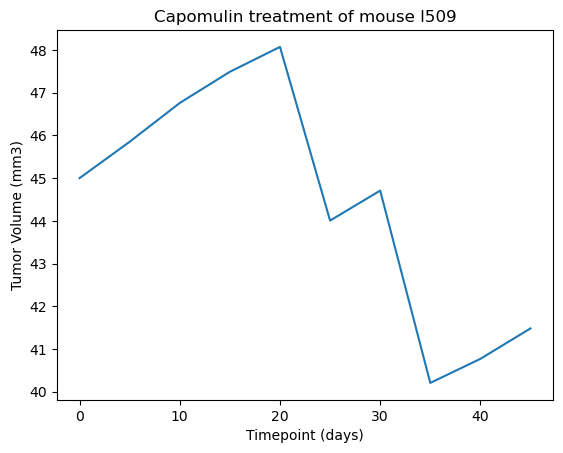

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
Capomulin_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_id)]

plt.plot(Capomulin_data['Timepoint'], Capomulin_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

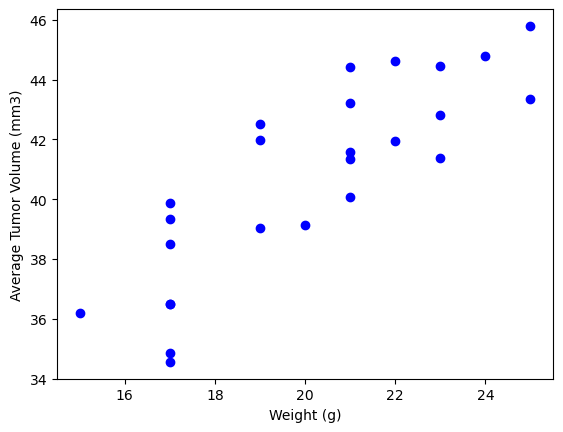

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = Capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight,avg_tumor_vol, color='blue')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


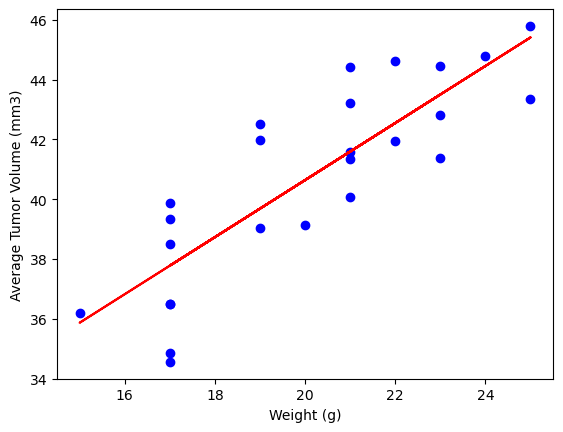

In [21]:
# Calculate the correlation coefficient and a linear regression model
Capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = Capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
merged_avg = pd.merge(avg_tumor_vol,mouse_weight, on='Mouse ID')

correlation = round(st.pearsonr(merged_avg['Weight (g)'],merged_avg['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and average tumor volume is {correlation}')

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight,avg_tumor_vol)
regress_values = mouse_weight * slope + intercept


plt.scatter(mouse_weight,avg_tumor_vol,color='blue')
plt.plot(mouse_weight,regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()
